imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from utils import create_dataloaders
from utils import plot_tsne
import AutoDecoder as AD

In [2]:
import importlib

In [103]:
importlib.reload(AD)

<module 'AutoDecoder' from '/home/nativ/Deep_learning_technion/Project - Autodecoder/AutoDecoder.py'>

In [117]:
# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(1337)
# Define model parameters
latent_dim = 128  # Dimension of latent space
output_shape = (1, 28, 28)  # Output shape for Fashion MNIST images

# Initialize model
auto_decoder = AD.AutoDecoder(latent_dim, output_shape).to(device)

# Create data loaders
train_ds, train_dl, test_ds, test_dl = create_dataloaders(data_path="dataset",batch_size=32)

# Initialize latent vectors for each training sample
train_latents = torch.randn(len(train_ds), latent_dim, requires_grad=True, device=device)
test_latents = torch.randn(len(test_ds), latent_dim, requires_grad=False, device=device)


In [118]:
# Initialize optimizer
optimizer = optim.Adam(list(auto_decoder.parameters()) + [train_latents], lr=1e-3)

In [119]:
# Train the AutoDecoder
AD.train_auto_decoder(auto_decoder, train_dl, optimizer, train_latents, device, epochs=100)

Epoch [1/100], Loss: 18221.2065
Epoch [2/100], Loss: 14648.2286
Epoch [3/100], Loss: 8042.2905
Epoch [4/100], Loss: 6157.5368
Epoch [5/100], Loss: 5081.7301
Epoch [6/100], Loss: 3966.0936
Epoch [7/100], Loss: 2960.5630
Epoch [8/100], Loss: 2401.9699
Epoch [9/100], Loss: 2337.9905
Epoch [10/100], Loss: 2134.1846
Epoch [11/100], Loss: 1864.5693
Epoch [12/100], Loss: 1723.9051
Epoch [13/100], Loss: 1600.9434
Epoch [14/100], Loss: 1593.1223
Epoch [15/100], Loss: 1592.1295
Epoch [16/100], Loss: 1317.6361
Epoch [17/100], Loss: 1112.7763
Epoch [18/100], Loss: 987.6227
Epoch [19/100], Loss: 937.0159
Epoch [20/100], Loss: 895.6111
Epoch [21/100], Loss: 820.7737
Epoch [22/100], Loss: 730.6105
Epoch [23/100], Loss: 654.9881
Epoch [24/100], Loss: 600.3863
Epoch [25/100], Loss: 535.5338
Epoch [26/100], Loss: 467.7035
Epoch [27/100], Loss: 458.9872
Epoch [28/100], Loss: 443.5850
Epoch [29/100], Loss: 437.9826
Epoch [30/100], Loss: 442.5047
Epoch [31/100], Loss: 460.5730
Epoch [32/100], Loss: 475.462

In [70]:
print(f"latents after:\n {latents}")

latents after:
 tensor([[-0.2084, -0.4920,  0.4367,  ..., -0.5652, -1.2771, -1.8830],
        [-1.0460,  0.0440, -0.5597,  ..., -0.1421,  1.2427,  0.8212],
        [-0.4970, -0.7444, -1.8660,  ...,  0.3432,  1.8006, -1.5484],
        ...,
        [ 0.6993,  0.3023, -0.4610,  ..., -0.3310, -0.3579, -1.2284],
        [ 0.3909, -1.9901,  0.1395,  ...,  0.8535, -0.3032,  0.5584],
        [-1.0225,  0.9501, -2.6512,  ...,  0.8431, -0.9470,  1.2646]],
       device='cuda:0', requires_grad=True)


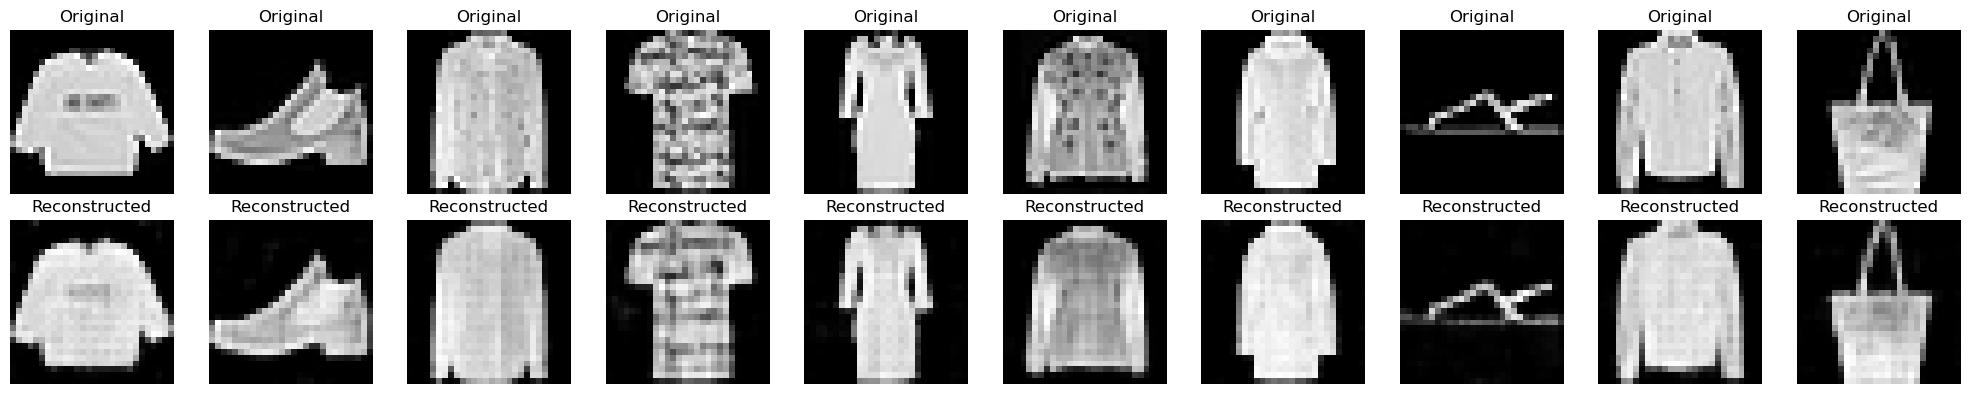

In [115]:
AD.visualize_reconstructions(auto_decoder, train_dl, train_latents, device)

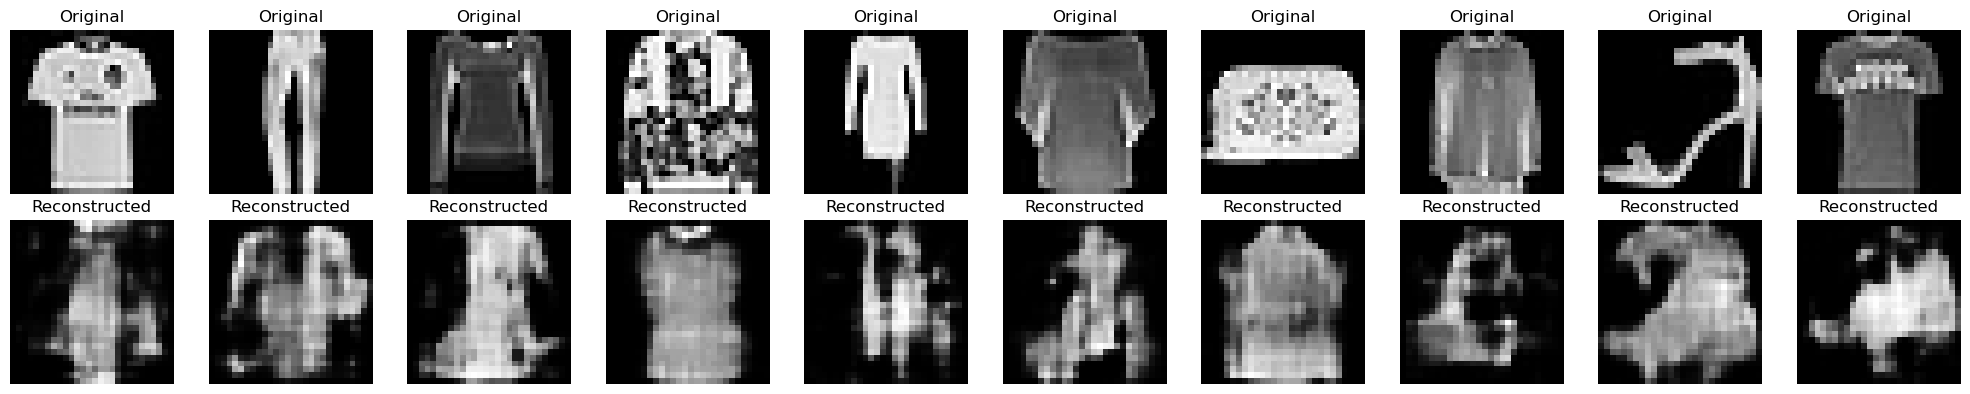

In [116]:
AD.visualize_reconstructions(auto_decoder, test_dl, test_latents, device)

In [ ]:
plot_tsne(dataset, latents, file_name, plot_title="t-SNE Plot")